In [270]:
#Import necessary libraries and modules for data manipulation, visualization, and machine learning

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.tree import export_graphviz 
import graphviz

In [196]:
# Load the dataset from a CSV file

data = pd.read_csv('BestCard_Data.csv')

In [197]:
# Display the first few rows of the dataset to get an overview of the data structure

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [198]:
# Generate descriptive statistics to understand the distribution, count, mean, etc., of the dataset

data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.011214,0.004313,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.105301,0.065532,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
# Get the shape of the dataset to determine the number of rows (samples) and columns (features)

data.shape

(26664, 31)

In [200]:
# Display information about the DataFrame, including the index dtype and columns, non-null values, and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [201]:
# Check for missing values in each column of the DataFrame

data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [202]:
# Display the count of unique values in the 'default payment next month' column

data['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

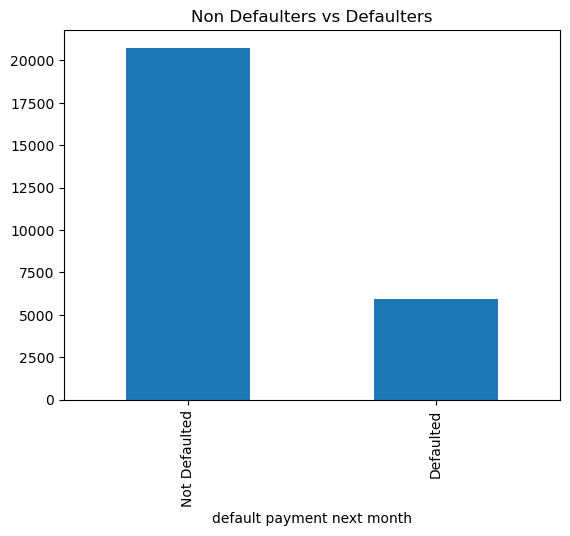

In [203]:
# Create a bar plot to visualize the count of 'Non Defaulters' vs 'Defaulters' in the 'default payment next month' column

data['default payment next month'].value_counts().plot.bar()
plt.title('Non Defaulters vs Defaulters')
plt.xticks([0,1], labels=["Not Defaulted", "Defaulted"])
plt.show()

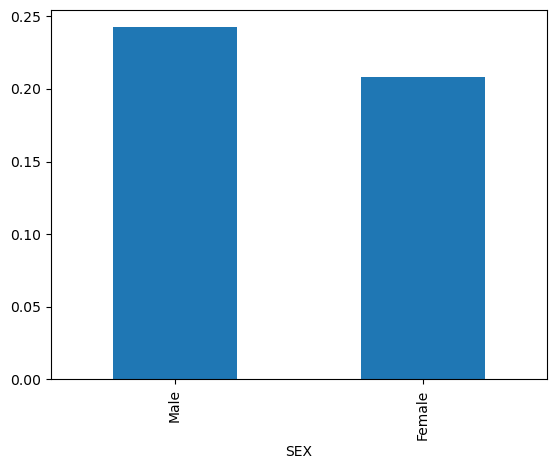

In [204]:
# Create a bar plot to visualize the mean value of 'default payment next month' grouped by 'SEX'

data.groupby('SEX')['default payment next month'].mean().plot.bar()
plt.xticks([0,1], labels=["Male", "Female"])
plt.show()

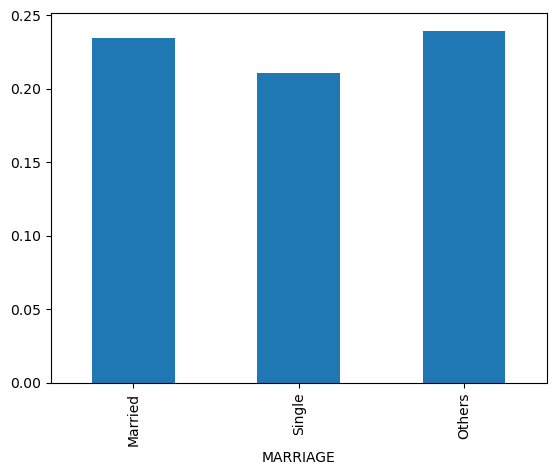

In [205]:
# Create a bar plot to visualize the mean value of 'default payment next month' grouped by 'MARRIAGE'

data.groupby('MARRIAGE')['default payment next month'].mean().plot.bar()
plt.xticks([0,1,2], labels=["Married", "Single", "Others"])
plt.show()

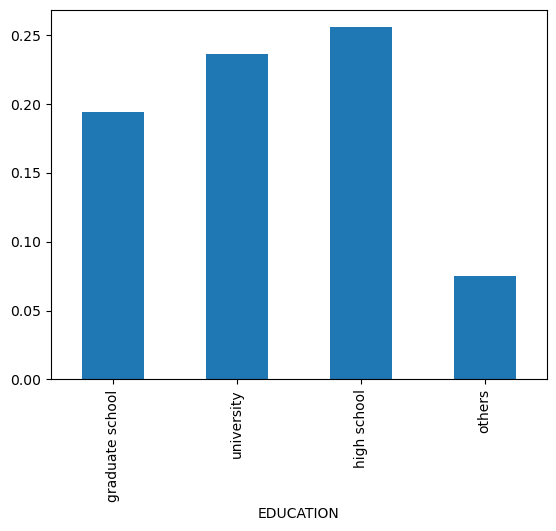

In [206]:
# Create a bar plot to visualize the mean value of 'default payment next month' grouped by 'EDUCATION'

data.groupby('EDUCATION')['default payment next month'].mean().plot.bar()
plt.xticks([0,1,2,3], labels=["graduate school", "university", "high school", "others"])
plt.show()

In [207]:
# Drop specific columns from the DataFrame that are not needed for further analysis or modeling

columns_to_drop = ['ID', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']
data = data.drop(columns=columns_to_drop)

In [208]:
# Display the first few rows of the updated DataFrame to verify the dropped columns

data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [209]:
# Separate the DataFrame into features (X) and the target variable (y) for machine learning modeling

X = data.drop('default payment next month', axis = 1)
y = data['default payment next month']

In [210]:
# Split the dataset into training and testing sets to prepare for model training and evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0, stratify = y)

# DECISION TREE

In [211]:
# Train a Decision Tree Classifier model with a specified max depth, then predict and print accuracy scores for both training and test sets

tree = DecisionTreeClassifier(max_depth = 5,random_state = 0)
tree.fit(X_train, y_train)
y_pred_dc = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred_dc, y_test)))

Accuracy on training set: 0.827
Accuracy on test set: 0.812


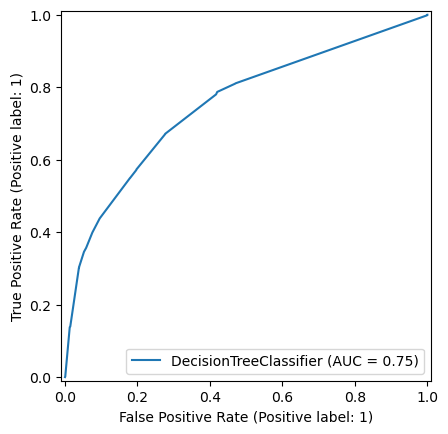

In [212]:
# Display the Receiver Operating Characteristic (ROC) curve for the Decision Tree Classifier to evaluate model performance

RocCurveDisplay.from_estimator(tree, X_test, y_test)

In [213]:
# Compute and print the confusion matrix for the Decision Tree Classifier predictions to evaluate classification accuracy

cm_dc = confusion_matrix(y_test, y_pred_dc)
print(cm_dc)

[[3908  242]
 [ 761  422]]


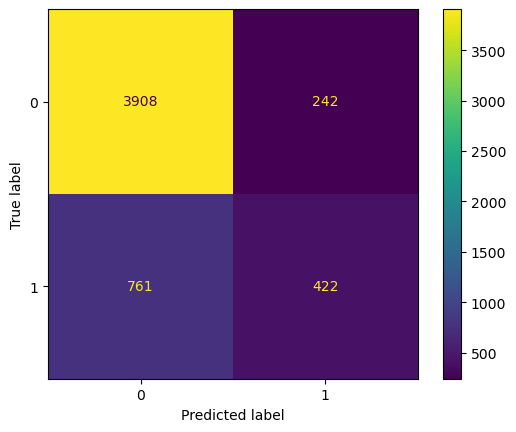

In [214]:
# Visualize the confusion matrix using ConfusionMatrixDisplay for a more intuitive understanding of classifier performance
ConfusionMatrixDisplay.from_estimator(tree,X_test,y_test)

In [215]:
# Calculate the F1 score, precision, and recall for the Decision Tree Classifier to evaluate the balance between precision and recall
f1_tree = f1_score(y_test, y_pred_dc)

print("F1 Score:", f1_tree)
precision_tree = precision_score(y_test, y_pred_dc)
recall_tree = recall_score(y_test, y_pred_dc)

print(f'Precision: {precision_tree}')
print(f'Recall: {recall_tree}')

F1 Score: 0.45695722793719545
Precision: 0.6355421686746988
Recall: 0.35672020287404904


In [216]:
# Create a DataFrame of feature importances from the Decision Tree Classifier to understand which features contribute most to the decision-making
importance_DC = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ["importance"])
importance_DC

,importance
LIMIT_BAL,0.016223
SEX,0.000000
EDUCATION,0.003210
MARRIAGE,0.000000
AGE,0.012380
PAY_1,0.691180
PAY_2,0.132056
PAY_3,0.013578
PAY_4,0.001324
PAY_5,0.024777


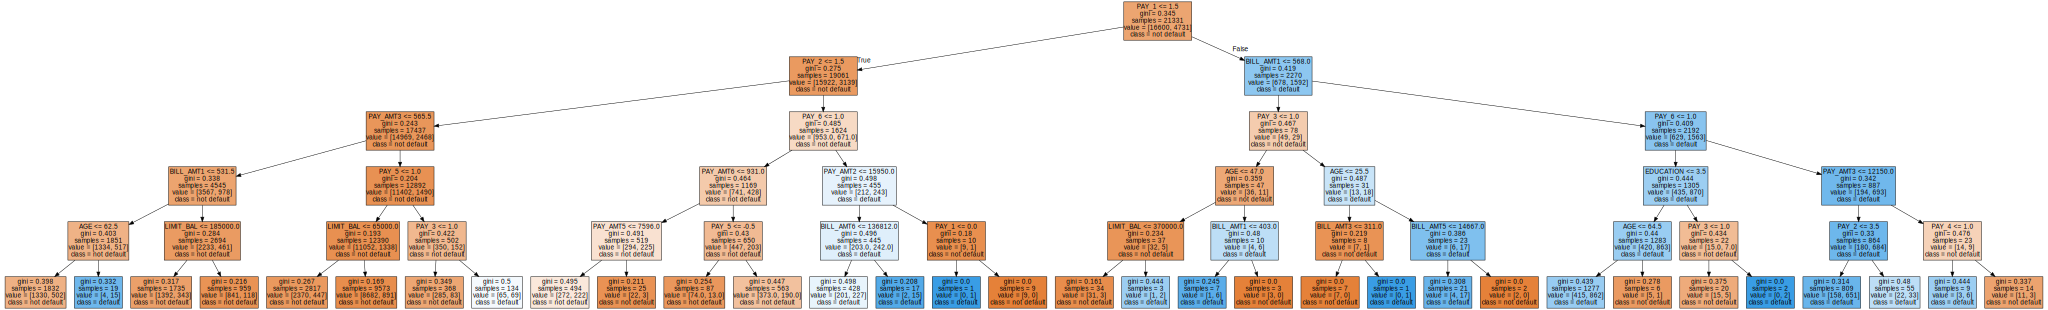

In [217]:
# Export the trained Decision Tree model to DOT format for visualization using Graphviz
dot_data = export_graphviz(tree,
                            class_names= ["not default", "default"],
                            feature_names=X_train.columns, 
                           filled = True)

graph = graphviz.Source(dot_data, format= "png") 
graph

In [218]:
# Use the trained Decision Tree model to predict class probabilities for the test set
tree.predict_proba(X_test)

array([[0.72598253, 0.27401747],
       [0.46962617, 0.53037383],
       [0.90692573, 0.09307427],
       ...,
       [0.90692573, 0.09307427],
       [0.90692573, 0.09307427],
       [0.90692573, 0.09307427]])

# CROSS VALIDATION

In [219]:
# Use cross-validation to assess the performance of the Decision Tree model, printing accuracy scores for each fold and the average score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv= 10)
#cv = number of subsets of data we created
print("Accuracy scores of each fold: {}".format(scores))
#A common way to summarize the cross-validation accuracy is to compute the mean:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Accuracy scores of each fold: [0.81027372 0.808024   0.81327334 0.80989876 0.81957989 0.8252063
 0.82820705 0.83308327 0.82445611 0.82370593]
Average cross-validation score: 0.82


# BAGGING

In [263]:
# Instantiate and train a Bagging Classifier with 100 estimators, then predict and print the accuracy on the test set
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=100, random_state=0)
#n_estimators = 100 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bagging.fit(X_train, y_train)
y_bagging_pred = bagging.predict(X_test)
print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.810


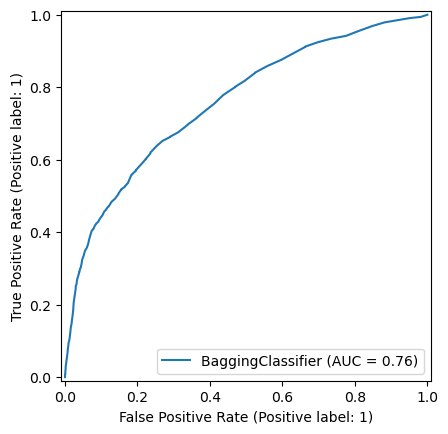

In [264]:
# Display the Receiver Operating Characteristic (ROC) curve for the Bagging Classifier to evaluate model performance
RocCurveDisplay.from_estimator(bagging, X_test, y_test)

In [265]:
# Compute and print the confusion matrix for the Bagging Classifier predictions to evaluate classification accuracy
cm_bagging = confusion_matrix(y_test, y_bagging_pred)
print(cm_bagging)

[[3897  253]
 [ 758  425]]


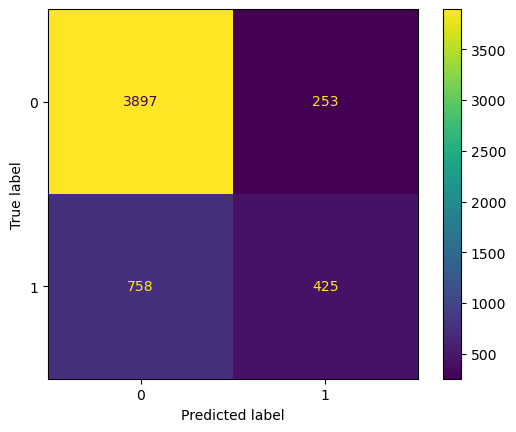

In [267]:
# Visualize the confusion matrix using ConfusionMatrixDisplay for the Bagging Classifier for a more intuitive understanding of classifier performance
ConfusionMatrixDisplay.from_estimator(bagging,X_test,y_test)

In [224]:
# Calculate the F1 score, precision, and recall for the Bagging Classifier to evaluate the balance between precision and recall
f1_bagging = f1_score(y_test, y_bagging_pred)
print("F1 Score:", f1_bagging)
precision_bagging = precision_score(y_test, y_bagging_pred)
recall_bagging = recall_score(y_test, y_bagging_pred)

print(f'Precision: {precision_bagging}')
print(f'Recall: {recall_bagging}')

F1 Score: 0.4567436861902203
Precision: 0.6268436578171092
Recall: 0.3592561284868977


In [225]:
# Generate and print a classification report for the Bagging Classifier predictions, providing key metrics for each class
from sklearn.metrics import classification_report
print(classification_report(y_test,y_bagging_pred,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4150
           1       0.63      0.36      0.46      1183

    accuracy                           0.81      5333
   macro avg       0.73      0.65      0.67      5333
weighted avg       0.79      0.81      0.79      5333



# BOOSTING

In [226]:
# Instantiate and train an AdaBoost Classifier with 100 estimators, then predict and print the accuracy on the test set
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators = 100, random_state=0)
boost.fit(X_train, y_train)
y_boost_pred = boost.predict(X_test)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred,y_test)))

/Users/HP/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy on test set: 0.811


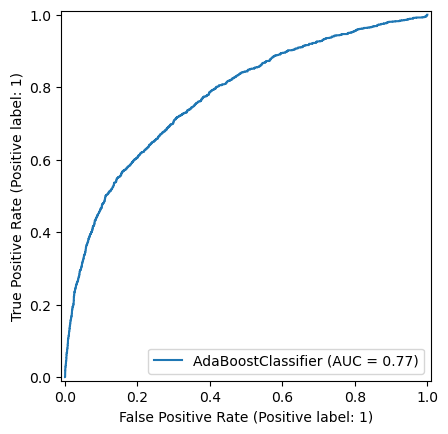

In [227]:
# Display the Receiver Operating Characteristic (ROC) curve for the AdaBoost Classifier to evaluate model performance
RocCurveDisplay.from_estimator(boost, X_test, y_test)

In [228]:
# Compute and print the confusion matrix for the AdaBoost Classifier predictions to evaluate classification accuracy
cm_boosting = confusion_matrix(y_test, y_boost_pred)
print(cm_boosting)

[[3979  171]
 [ 836  347]]


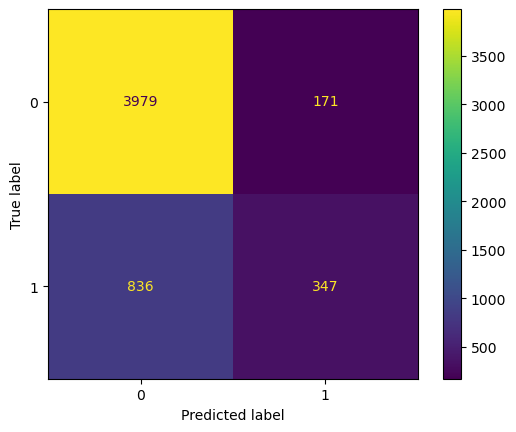

In [229]:
# Visualize the confusion matrix using ConfusionMatrixDisplay for the AdaBoost Classifier for a more intuitive understanding of classifier performance
ConfusionMatrixDisplay.from_estimator(boost,X_test,y_test)

In [230]:
# Calculate precision, recall, and the F1 score for the AdaBoost Classifier and print these metrics to evaluate model performance
precision_boost = precision_score(y_test, y_boost_pred)
recall_boost = recall_score(y_test, y_boost_pred)
f1_boost = f1_score(y_test, y_boost_pred)
print("F1 Score:", f1_boost)
print(f'Precision: {precision_boost}')
print(f'Recall: {recall_boost}')

F1 Score: 0.4079952968841858
Precision: 0.6698841698841699
Recall: 0.2933220625528318


In [231]:
# Generate and print a classification report for the Bagging Classifier predictions, providing key metrics for each class (Note: This appears to be a duplicate cell)
print(classification_report(y_test,y_bagging_pred,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4150
           1       0.63      0.36      0.46      1183

    accuracy                           0.81      5333
   macro avg       0.73      0.65      0.67      5333
weighted avg       0.79      0.81      0.79      5333



# RANDOM FOREST

In [232]:
# Instantiate and train a Random Forest Classifier with 1000 estimators
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [233]:
# Use the trained Random Forest Classifier to make predictions on the test set and print the accuracy
y_rf_pred = forest.predict(X_test)
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Random Forest Accuracy on test set: 0.811


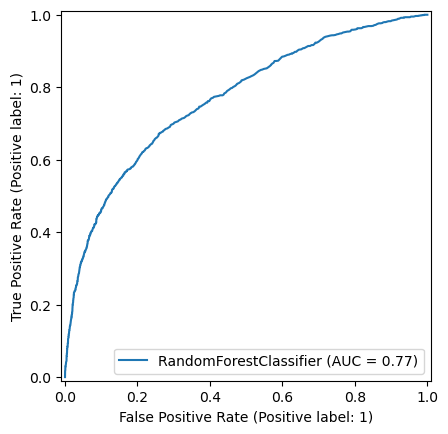

In [234]:
# Display the Receiver Operating Characteristic (ROC) curve for the Random Forest Classifier to evaluate model performance
RocCurveDisplay.from_estimator(forest, X_test, y_test)

In [235]:
# Calculate and display feature importances from the Random Forest Classifier to understand which features contribute most to the decision-making
importances_RF = forest.feature_importances_
df_RF = pd.DataFrame({'feature': X_train.columns, 'importance': importances_RF})
df_RF = df_RF.sort_values('importance')
print(df_RF)

      feature  importance
1         SEX    0.012065
3    MARRIAGE    0.013813
10      PAY_6    0.019625
2   EDUCATION    0.020599
9       PAY_5    0.020817
8       PAY_4    0.023240
7       PAY_3    0.027396
20   PAY_AMT4    0.043171
21   PAY_AMT5    0.043432
6       PAY_2    0.045573
19   PAY_AMT3    0.045949
22   PAY_AMT6    0.046163
18   PAY_AMT2    0.047032
15  BILL_AMT5    0.049409
16  BILL_AMT6    0.049614
14  BILL_AMT4    0.049788
17   PAY_AMT1    0.050990
13  BILL_AMT3    0.051449
12  BILL_AMT2    0.053987
0   LIMIT_BAL    0.058602
11  BILL_AMT1    0.060460
4         AGE    0.066054
5       PAY_1    0.100771


In [236]:
# Compute and print the confusion matrix for the Random Forest Classifier predictions to evaluate classification accuracy
cm_forest = confusion_matrix(y_test, y_rf_pred)
print(cm_forest)

[[3907  243]
 [ 764  419]]


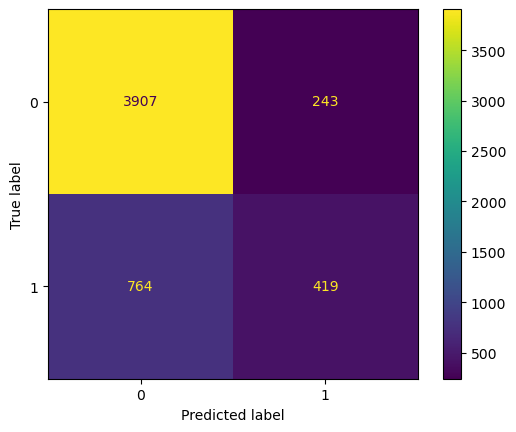

In [237]:
# Visualize the confusion matrix using ConfusionMatrixDisplay for the Random Forest Classifier for a more intuitive understanding of classifier performance
ConfusionMatrixDisplay.from_estimator(forest,X_test,y_test)

In [238]:
# Calculate precision, recall, and the F1 score for the Random Forest Classifier and print these metrics to evaluate model performance
from sklearn.metrics import precision_score, recall_score
f1_forest = f1_score(y_test, y_rf_pred)
print("F1 Score:", f1_forest)
precision_forest = precision_score(y_test, y_rf_pred)
recall_forest = recall_score(y_test, y_rf_pred)

print(f'Precision: {precision_forest}')
print(f'Recall: {recall_forest}')

F1 Score: 0.45420054200542004
Precision: 0.6329305135951662
Recall: 0.35418427726120033


In [239]:
# Generate and print a classification report for the Bagging Classifier predictions, providing key metrics for each class (Note: This appears to be a duplicate cell)
print(classification_report(y_test,y_bagging_pred,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4150
           1       0.63      0.36      0.46      1183

    accuracy                           0.81      5333
   macro avg       0.73      0.65      0.67      5333
weighted avg       0.79      0.81      0.79      5333



# GRID SEARCH

In [240]:
#tree_grid = DecisionTreeClassifier(random_state=0)
#tree_grid.get_params()

In [241]:
#import numpy as np
#from sklearn.model_selection import GridSearchCV
#params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 50)),'max_depth': np.arange(3, 15)}
#tree_grid_cv = GridSearchCV(tree_grid, params, cv=10)
#tree_grid_cv.fit(X_train, y_train)

In [242]:
#tree_grid_cv.best_estimator_

In [243]:
#y_pred_grid = tree_grid_cv.predict(X_test)
#print("Grid-search Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred_grid)))

In [244]:
#RocCurveDisplay.from_estimator(tree_grid_cv, X_test, y_test)

In [245]:
#cm_grid = confusion_matrix(y_test, y_pred_grid)
#print(cm_grid)

In [246]:
#ConfusionMatrixDisplay.from_estimator(tree_grid_cv,X_test,y_test)

In [247]:
#f1_grid = f1_score(y_test, y_pred_grid)
#print("F1 Score:", f1_grid)

In [248]:
#print(classification_report(y_test,y_pred_grid,target_names=["0","1"]))

# LOGISTIC REGRESSION

In [249]:
# Prepare features for a Logistic Regression model by dropping the target variable and standardizing the feature set using StandardScaler
X_lr = data.drop('default payment next month', axis=1)  # Features: All columns except the target variable
y_lr = data['default payment next month']  # Target variable: 'default payment next month'

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_lr = pd.DataFrame(scaler.fit_transform(X_lr), columns = X_lr.columns)
X_lr


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.139267,0.811301,0.211732,-1.066310,-1.246871,1.790797,1.779853,-0.694097,-0.663579,-1.528864,...,-0.674448,-0.674283,-0.664497,-0.654365,-0.341581,-0.244750,-0.304632,-0.306282,-0.316347,-0.298146
1,-0.369071,0.811301,0.211732,0.851409,-1.030122,-0.871733,1.779853,0.139833,0.192677,0.238368,...,-0.645440,-0.623376,-0.607582,-0.599495,-0.341581,-0.230090,-0.246712,-0.243610,-0.316347,-0.184736
2,-0.600130,0.811301,0.211732,0.851409,-0.163127,0.015777,0.111264,0.139833,0.192677,0.238368,...,-0.487123,-0.451316,-0.418256,-0.392736,-0.250678,-0.206521,-0.246712,-0.243610,-0.251037,-0.014621
3,-0.908208,0.811301,0.211732,-1.066310,0.161997,0.015777,0.111264,0.139833,0.192677,0.238368,...,0.032963,-0.233763,-0.187450,-0.157204,-0.221814,-0.182056,-0.235128,-0.237342,-0.246530,-0.241441
4,-0.908208,-1.232588,0.211732,-1.066310,2.329485,-0.871733,0.111264,-0.694097,0.192677,0.238368,...,-0.162892,-0.348491,-0.349101,-0.332465,-0.221814,1.451872,0.274570,0.257768,-0.271348,-0.259643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,0.401126,-1.232588,1.554650,-1.066310,0.378746,0.015777,0.111264,0.139833,0.192677,0.238368,...,2.348313,0.694917,-0.149924,-0.385484,0.167429,0.665549,-0.014857,-0.115320,0.010206,-0.241441
26660,-0.138012,-1.232588,1.554650,0.851409,0.812243,-0.871733,-0.723030,-0.694097,-0.663579,0.238368,...,-0.633505,-0.534584,-0.579001,-0.654365,-0.231575,-0.111017,0.216534,-0.298197,-0.316347,-0.298146
26661,-1.062248,-1.232588,0.211732,0.851409,0.161997,3.565817,2.614147,1.807691,-0.663579,0.238368,...,-0.644334,-0.349455,-0.325446,-0.328662,-0.341581,-0.277229,0.969613,-0.043059,-0.185726,-0.122360
26662,-0.677149,-1.232588,1.554650,-1.066310,0.595494,0.903287,-0.723030,0.139833,0.192677,0.238368,...,0.426142,0.146795,-0.469207,0.169172,4.802414,-0.116532,-0.236402,-0.185575,3.142767,-0.195850


In [250]:
# Display the target variable 'y_lr' for Logistic Regression to verify its content
y_lr

0        1
1        1
2        0
3        0
4        0
        ..
26659    0
26660    0
26661    1
26662    1
26663    1
Name: default payment next month, Length: 26664, dtype: int64

In [251]:
# Split the standardized features and target variable into training and testing sets for Logistic Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=0)

# Display the sizes of the training and testing datasets to verify the split
print("Training set size:", X_train_lr.shape)
print("Testing set size:", X_test_lr.shape)

Training set size: (21331, 23)
Testing set size: (5333, 23)


In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=16, max_iter=3000)

# Train the model on the training set
logistic_regression.fit(X_train_lr, y_train_lr)

# Make predictions on the testing set
y_pred_lr = logistic_regression.predict(X_test_lr)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)

print(f"Accuracy of Logistic Regression model: {accuracy_lr:.4f}")

Accuracy of Logistic Regression model: 0.8239


In [253]:
# Display the coefficients of each feature in the Logistic Regression model to understand their impact on the prediction
coef = pd.DataFrame(logistic_regression.coef_[0], index = X_lr.columns,columns=['Coefficients'])
coef

,Coefficients
LIMIT_BAL,-0.096103
SEX,-0.047795
EDUCATION,-0.074592
MARRIAGE,-0.081745
AGE,0.069008
PAY_1,0.636673
PAY_2,0.090649
PAY_3,0.114854
PAY_4,0.021811
PAY_5,0.029638


In [254]:
# Use the trained Logistic Regression model to make predictions on the test set and display the predicted values
y_pred_lr=logistic_regression.predict(X_test_lr)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [255]:
# Print the accuracy of the Logistic Regression model using sklearn metrics for the predictions on the test set
import sklearn.metrics as metrics
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test_lr, y_pred_lr)))

Accuracy::0.824


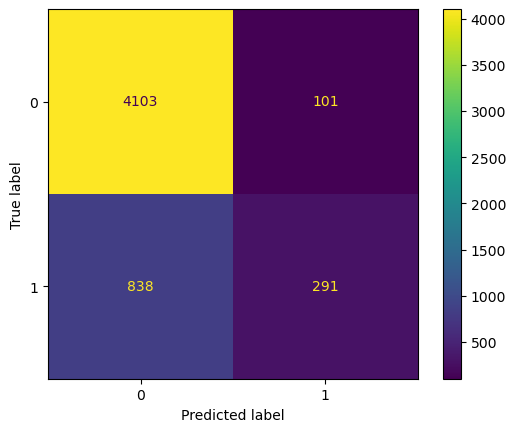

In [256]:
# Visualize the confusion matrix for the Logistic Regression model using ConfusionMatrixDisplay for a more intuitive understanding of classifier performance
ConfusionMatrixDisplay.from_estimator(logistic_regression,X_test_lr,y_test_lr)

In [257]:
# Generate and print a classification report for the Logistic Regression model predictions, providing key metrics for each class
print(classification_report(y_test_lr,y_pred_lr,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4204
           1       0.74      0.26      0.38      1129

    accuracy                           0.82      5333
   macro avg       0.79      0.62      0.64      5333
weighted avg       0.81      0.82      0.79      5333



In [258]:
# Calculate precision, recall, and the F1 score for the Logistic Regression model and print these metrics to evaluate model performance
precision_lr = precision_score(y_test_lr, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_forest = f1_score(y_test_lr, y_pred_lr)
print("F1 Score:", f1_forest)
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')

F1 Score: 0.3826429980276134
Precision: 0.7423469387755102
Recall: 0.08030431107354184


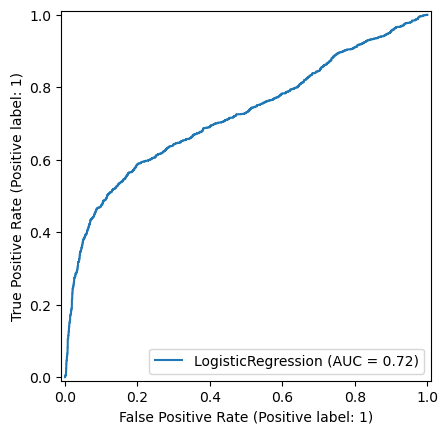

In [259]:
# Display the Receiver Operating Characteristic (ROC) curve for the Logistic Regression model to evaluate model performance
RocCurveDisplay.from_estimator(logistic_regression, X_test_lr, y_test_lr)

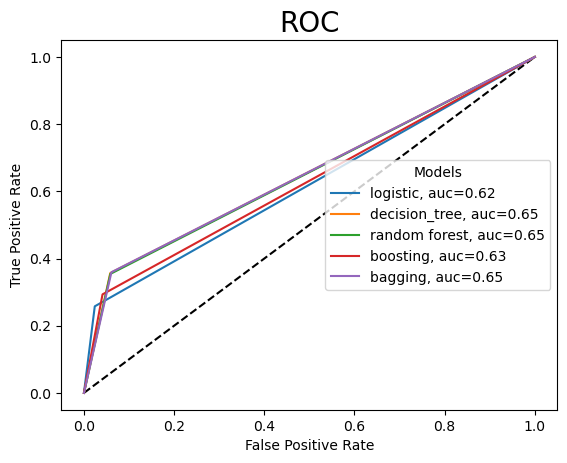

In [260]:
# logistic model 
pred_logit= logistic_regression.predict(X_test_lr)
fpr1, tpr1, _ = metrics.roc_curve(y_test_lr,  pred_logit)
auc1 = metrics.roc_auc_score(y_test_lr, pred_logit)

# decision tree model:
pred_tree = tree.predict(X_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  pred_tree)
auc2 = metrics.roc_auc_score(y_test, pred_tree)

# random forest model: 
pred_rf= forest.predict(X_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  pred_rf)
auc3 = metrics.roc_auc_score(y_test, pred_rf)

# boosting:
boost_pred= boost.predict(X_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  boost_pred)
auc4 = metrics.roc_auc_score(y_test, boost_pred)

#bagging
bagging_pred= bagging.predict(X_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test,  bagging_pred)
auc5 = metrics.roc_auc_score(y_test, bagging_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="random forest, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="boosting, auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="bagging, auc="+str(round(auc5,2)))

plt.legend(loc=5, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=20)
plt.box(True)
plt.show()

# ACCURACY COMPARISON

In [268]:
# Prepare a dictionary containing the accuracies of different machine learning models including Logistic Regression, Decision Tree, Random Forest, Boosting, and Bagging for comparison purposes.
data = {'logistic_regression':82.39,
                'decision_tree':81.2,
               'random_forest': 81.1,
                'Boosting': 81.1,
               'Bagging':81}
courses = list(data.keys())
values = list(data.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, 'logistic_regression'),
  Text(1, 0, 'decision_tree'),
  Text(2, 0, 'random_forest'),
  Text(3, 0, 'Boosting'),
  Text(4, 0, 'Bagging')])

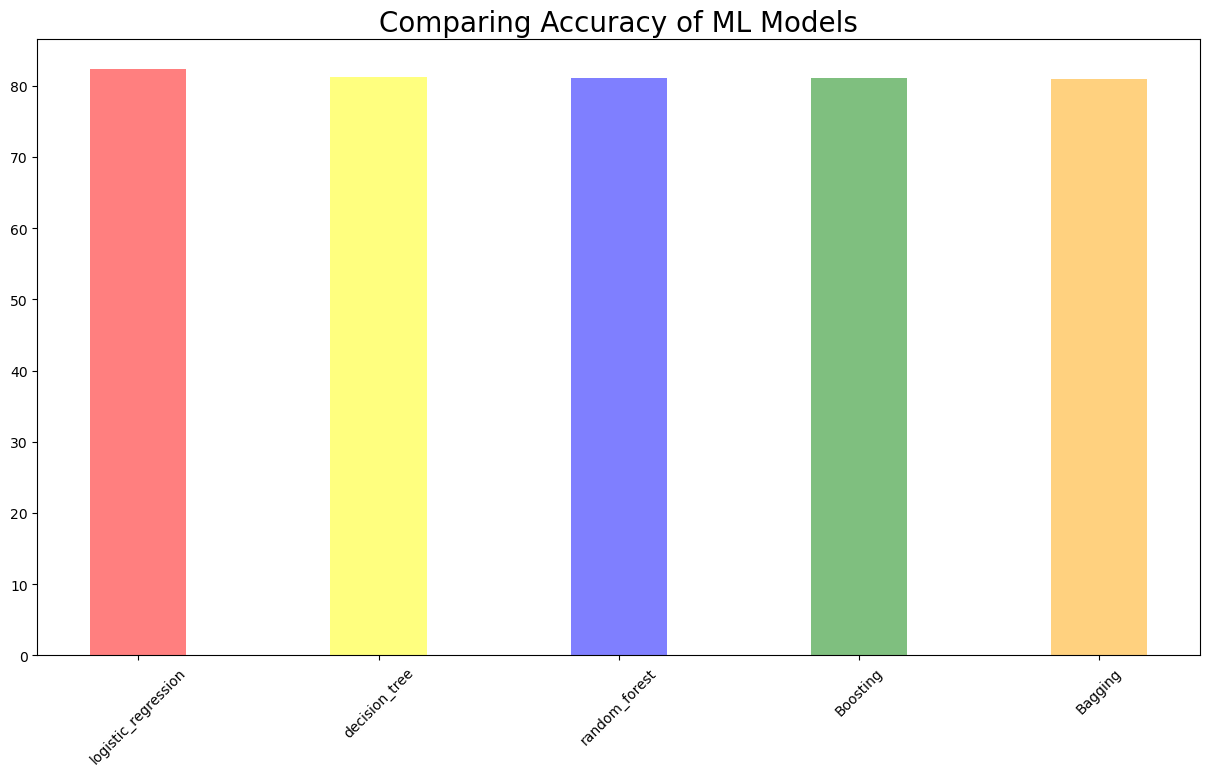

In [269]:
# Visualize the accuracies of different machine learning models on a bar chart, with distinct colors for each model. The chart includes titles and rotated x-axis labels for clarity.
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','blue','green','orange']
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)